Name: Nguyễn Lâm Vĩnh Gia - ID:2052074

# LDA EXERCISE

In this context, we are going to program the Linear Discriminant Analysis (LDA) algorithm from scratch, which then will be used to reduce the dimension of Wine dataset.

## Data visualization

The dataset of Wine consists of 178 samples of 3 different types of wine, each having 13 additional features. The objective of our project today is reduce the dimensionality of the dataset in order to use it for some classification step afterward.

- Fisrtly we will import the data from the CSV file

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = r"C:\Studying Documents\Artificial intelligient\Exercise\PCA & LDA\wine.csv"
df = pd.read_csv(file_path, encoding='utf-8')
print(df.info())

# Get the list of columns
cols = df.columns
n_features = len(cols)

df = df.to_numpy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None


- Visualize the data to check whether classes of the data is distributed separatedly using historgram

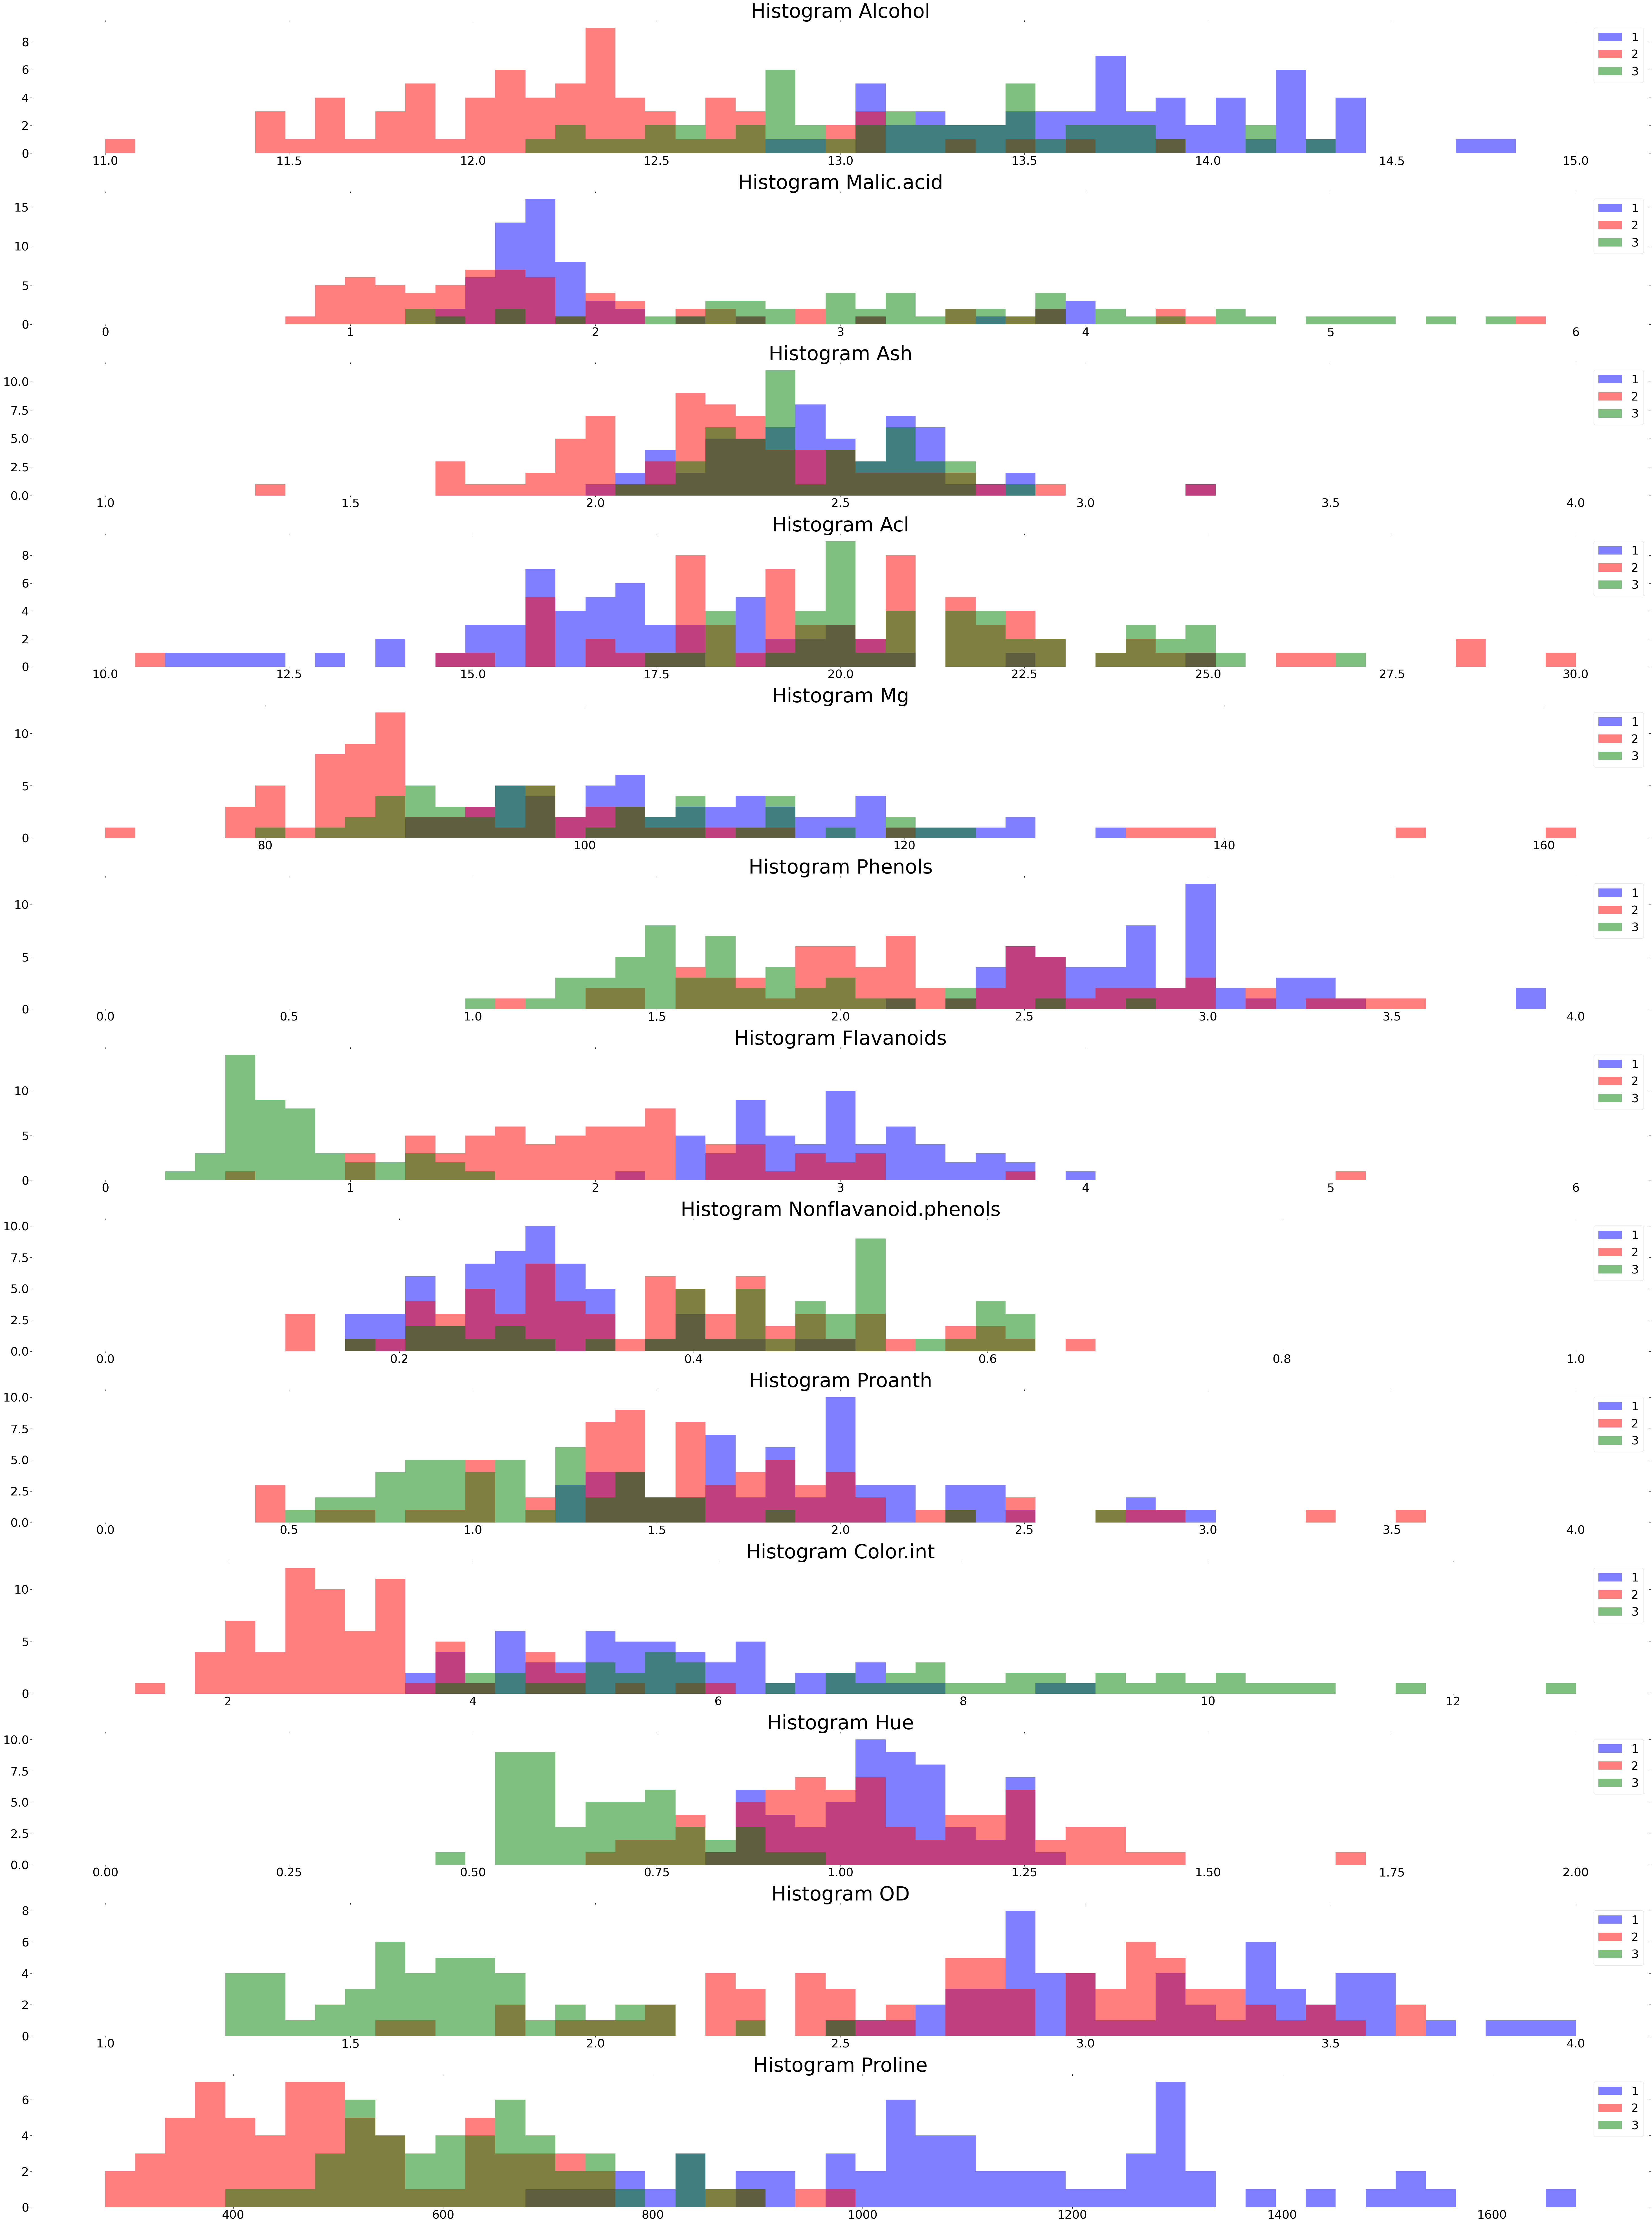

In [31]:
import math

fig, axes = plt.subplots(nrows=13, ncols=1, figsize=(60, 80))
fig.tight_layout(pad=8)

for ax, cnt in zip(axes.ravel(), range(1, n_features)):
    # Set the bin sizes
    min_b = math.floor(np.min(df[:,cnt]))
    max_b = math.ceil(np.max(df[:,cnt]))
    bins = np.linspace(min_b, max_b, 50)
    
    # Plot the histograms
    for label, colors in zip(range(1,4), ('blue', 'red', 'green')):
        ax.hist(df[df[:,0] == label, cnt], color=colors, label=label, bins=bins, alpha=0.5)    

    # Plot legend
    leg = ax.legend(loc='upper right', fancybox=True, fontsize=30)
    leg.get_frame().set_alpha(0.5)
    ax.xaxis.set_tick_params(labelsize=30)
    ax.yaxis.set_tick_params(labelsize=30)
    ax.set_title('Histogram %s' %cols[cnt], fontsize = 50)

    # Hide axis ticls
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # Remove axis splines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    
    

As we can clearly see that, some features such as Alcohol, OD or Flavanoids are potentially suited for discrimination between wine types. Besides, the LDA assumes normal distribution, independence, as well as identical covariance matrix between classes of data, but it has been proved that the violation of this assumption has not much influence on the dimensionality reduction of LDA.

## LDA algorithm

In the next part, we will step-by-step program the LDA algorithm in 6 steps.

### Step 1: Calculate the mean vectors of each classes

In [56]:
classes = np.unique(df[:,0]).astype(int)

mean_vects = []
for cl in classes:
    cols_mean = []
    for i in range(1,n_features):
        cols_mean.append(np.mean(df[df[:,0]==cl,i], axis=0))       
    mean_vects.append(cols_mean)
    print('Mean Vector class %s: %s\n' %(cl, mean_vects[cl-1]))

Mean Vector class 1: [13.744745762711865, 2.010677966101695, 2.4555932203389834, 17.037288135593222, 106.33898305084746, 2.8401694915254234, 2.982372881355932, 0.29000000000000004, 1.8993220338983048, 5.528305084745763, 1.0620338983050848, 3.1577966101694916, 1115.7118644067796]

Mean Vector class 2: [12.278732394366195, 1.932676056338028, 2.244788732394366, 20.238028169014086, 94.54929577464789, 2.25887323943662, 2.0808450704225354, 0.3636619718309859, 1.630281690140845, 3.086619718309859, 1.0562816901408452, 2.785352112676056, 519.5070422535211]

Mean Vector class 3: [13.153750000000002, 3.3337499999999998, 2.4370833333333333, 21.416666666666668, 99.3125, 1.6787500000000002, 0.7814583333333333, 0.4475, 1.1535416666666667, 7.396249979166666, 0.6827083333333333, 1.6835416666666667, 629.8958333333334]



### Step 2: Calculate the scatter matrices

- Within-class scatter matrix

In [57]:
# Calculate the within-class scatter matrix
S_W = np.zeros((n_features - 1, n_features - 1))
for cl, mv in zip(classes, mean_vects):
    # Scatter matrix for each class
    class_scatter_mat = np.zeros((n_features - 1, n_features - 1))
    for row in df[df[:,0] == cl, 1:n_features]:
        row = np.reshape(row, (n_features - 1, 1))
        mv = np.reshape(mv, (n_features - 1, 1))
        class_scatter_mat += (row - mv).dot((row - mv).T)
    S_W += class_scatter_mat
    
print(S_W)

[[ 4.5859e+01  1.4303e+00 -2.3291e+00 -1.7013e+01  3.1383e+00  4.7422e+00
   3.9605e+00 -1.7072e-01  2.9350e+00  4.3130e+01  1.3687e-01 -8.7244e-01
   2.1415e+03]
 [ 1.4303e+00  1.5532e+02  3.7434e+00  7.2582e+01 -1.5563e+02 -2.5349e+00
  -1.6466e+00  1.7807e+00  3.0105e+00 -4.5273e+01 -7.3732e+00  8.1426e+00
  -5.7852e+03]
 [-2.3291e+00  3.7434e+00  1.1563e+01  8.4728e+01  1.2067e+02  2.8298e+00
   5.2449e+00  1.2286e+00  4.6912e-01  1.7140e+00  4.0639e-01  1.9095e+00
  -8.7672e+01]
 [-1.7013e+01  7.2582e+01  8.4728e+01  1.4012e+03  5.6662e+02  1.9008e+01
   4.3123e+01  8.2101e+00  1.6227e+01 -1.7814e+01 -1.7204e+00  3.9486e+01
  -5.7458e+03]
 [ 3.1383e+00 -1.5563e+02  1.2067e+02  5.6662e+02  3.1615e+04  1.0100e+02
   1.1670e+02 -5.0235e+01  2.2757e+02  3.1017e+02  2.2078e+01 -4.9198e+01
   8.3344e+04]
 [ 4.7422e+00 -2.5349e+00  2.8298e+00  1.9008e+01  1.0100e+02  3.3472e+01
   2.8229e+01 -1.3538e+00  1.6073e+01  3.4822e+01 -2.5642e-01  1.0476e+01
   1.4692e+03]
 [ 3.9605e+00 -1.6466e

- Between-class scatter matrix

In [72]:
df_mean = np.mean(df[:, 1:n_features], axis=0).reshape(n_features - 1, 1)

S_B = np.zeros((n_features - 1, n_features - 1))
for cl, mv in zip(classes, mean_vects):
    class_size = df[df[:,0] == cl, 1:n_features].shape[0]
    mv = np.reshape(mv, (n_features - 1, 1))
    S_B += class_size * (mv - df_mean).dot((mv - df_mean).T)
    
print(S_B)

[[ 7.0795e+01  1.3723e+01  1.0668e+01 -1.3186e+02  5.5262e+02  2.1257e+01
   3.0029e+01 -2.6178e+00  8.3076e+00  1.3888e+02 -2.4933e+00  8.2530e+00
   2.6987e+04]
 [ 1.3723e+01  6.5578e+01  5.1556e+00  1.1793e+02  1.5062e+00 -3.8943e+01
  -7.9531e+01  5.4292e+00 -2.7994e+01  1.5941e+02 -1.7995e+01 -5.9906e+01
  -6.1709e+03]
 [ 1.0668e+01  5.1556e+00  1.7592e+00 -1.2829e+01  7.8095e+01  1.0900e+00
   3.3671e-01 -1.0316e-01 -2.0087e-01  2.7430e+01 -1.2351e+00 -1.7747e+00
   3.5073e+03]
 [-1.3186e+02  1.1793e+02 -1.2829e+01  5.7283e+02 -1.2702e+03 -1.3780e+02
  -2.5058e+02  1.8415e+01 -8.2987e+01  4.3483e+01 -3.5293e+01 -1.5564e+02
  -7.6268e+04]
 [ 5.5262e+02  1.5062e+00  7.8095e+01 -1.2702e+03  4.4910e+03  2.3822e+02
   3.7768e+02 -3.0399e+01  1.1454e+02  8.6166e+02  9.9330e+00  1.6767e+02
   2.2980e+05]
 [ 2.1257e+01 -3.8943e+01  1.0900e+00 -1.3780e+02  2.3822e+02  3.5857e+01
   6.7435e+01 -4.8492e+00  2.2756e+01 -4.8981e+01  1.1237e+01  4.4575e+01
   1.5907e+04]
 [ 3.0029e+01 -7.9531e

### Step 3: Find the eigenvalues and eigenvectors of the scatter matrix

In [75]:
eig_vals, eig_vects = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
eig_vals = np.real(eig_vals)
eig_vects = np.real(eig_vects).T

### Step 4: Sort the eigenvalues and eigenvalues corresponding to the decreasing values of eigenvalues

In [76]:
# Index the eigenvalues in descending order
idx = eig_vals.argsort()[::-1]
# Sort the eigenvalues and eigenvectors
eig_vals = eig_vals[idx]
eig_vects = eig_vects[idx]

print("Eigenvalues\n", eig_vals)
print("Eigenvectors\n", eig_vects)

Eigenvalues
 [ 9.0817e+00  4.1285e+00  6.6574e-16  3.3234e-16  3.3234e-16  5.3402e-17
  1.0396e-17  1.0396e-17 -1.9583e-17 -1.9583e-17 -2.0044e-16 -8.8818e-16
 -9.8826e-16]
Eigenvectors
 [[-1.4368e-01  5.8860e-02 -1.3146e-01  5.5136e-02 -7.7060e-04  2.2014e-01
  -5.9168e-01 -5.3278e-01  4.7761e-02  1.2646e-01 -2.9137e-01 -4.1230e-01
  -9.5856e-04]
 [-2.5445e-01 -8.9130e-02 -6.8467e-01  4.2724e-02  1.3506e-04  9.4018e-03
   1.4360e-01  4.7602e-01  8.9628e-02 -7.3909e-02  4.4236e-01 -1.4939e-02
  -8.3269e-04]
 [-9.6624e-03  3.5970e-02  5.2115e-01 -3.0897e-03 -1.3259e-03  3.1067e-01
  -1.5072e-01 -3.1829e-01 -8.4356e-03  4.1091e-02  7.1035e-01 -1.0108e-02
  -4.3492e-04]
 [ 9.6261e-02 -1.2611e-01  2.4533e-01  1.0714e-02  1.8080e-03  2.6320e-01
  -1.1454e-01  6.2315e-01 -1.2614e-01  1.1299e-02 -7.1424e-02  1.1011e-01
  -3.4906e-04]
 [ 9.6261e-02 -1.2611e-01  2.4533e-01  1.0714e-02  1.8080e-03  2.6320e-01
  -1.1454e-01  6.2315e-01 -1.2614e-01  1.1299e-02 -7.1424e-02  1.1011e-01
  -3.4906e-04

### Step 5: Find the dimension of plane to be projected

In this part, we can directly choose the dimension to be kept, normally 2-3. However, it is suggested that we should check how much information these dimension preserve. Assume we want to keep 85% of information from the original data, we are going to calculate the necessary dimension to be kept

Cumulative explained variance: [0.6875 1.     1.     1.     1.     1.     1.     1.     1.     1.
 1.     1.     1.    ]


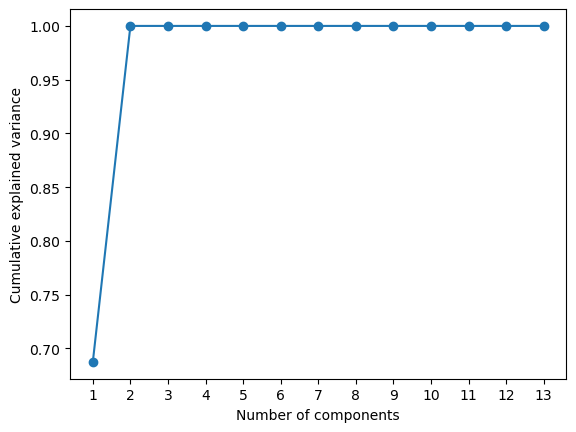

The number of principal components explaining at least 85% of the variance is 2


In [77]:
# Get the accumulative variance 
explained_var = np.cumsum(eig_vals) / np.sum(eig_vals)
print('Cumulative explained variance: {}'.format(explained_var))

plt.plot(np.arange(1,n_features), explained_var, '-o')
plt.xticks(np.arange(1,n_features))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.show()

# Get the number of principle components that explain at least 85% of the variance
n_components = np.argmax(explained_var >= 0.85) + 1
print("The number of principal components explaining at least 85% of the variance is", n_components)

Thus, we will project the data onto 2 dimensions of the first 2 eigenvectors

### Step 6: Project the data

In [85]:
# Get the projection matrix
proj_mat = eig_vects[:,:n_components]

df_proj = df[:,1:n_features].dot(proj_mat)
print(df_proj.shape)

(178, 2)


We have successully reduce the dimension of the data from 13 to only 2, now we will visualize the scatter plot of the data after dimensionality reduction.

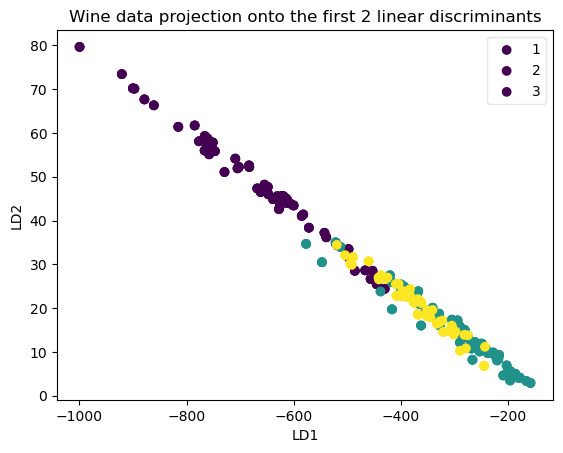

In [91]:
# insert the type of wine columns back to the data after projected
df_proj = np.insert(df_proj, 2, df[:,0], axis=1)

for cl, cols in zip(classes, ('blue', 'red', 'green')):
    plt.scatter(df_proj[:,0], df_proj[:,1], c = df_proj[:,2].tolist(), label=cl)
plt.xlabel('LD1')
plt.ylabel('LD2')
leg = plt.legend(loc='upper right', fancybox=True)
leg.get_frame().set_alpha(0.5)
plt.title('Wine data projection onto the first 2 linear discriminants')
plt.tight_layout
plt.show()

As we can see the data classes are separated as we intended.

## Classification

In the last part of this context, we are going to apply the KNN classification algorithm onto our newly reduced dataset. The KNN algorithm from the last exercise will be reused with the choice of K = 5, as we have 3 classes of wine. 

In [96]:
from math import sqrt

class KNN:
    # Initiate the k value for the class and the number of feature of each class
    def __init__(self, k):
        self.k = k

    # Function to calculate the Euclidean distance between the new point and the data points
    def euclideanDistance(self, new_point, data_point):
        dist = 0.0
        for i in range(len(data_point) - 1):
            dist += (new_point[i] - data_point[i]) ** 2
        return sqrt(dist)
    
    # Function to find the k nearest neighbour
    def getKNeighbour(self, new_point, data_frame):
        distances = []
        # Get the list of distances
        for data in data_frame:
            dist = self.euclideanDistance(new_point, data)
            distances.append((dist, data[-1]))
        # Get k smallest distance
        return sorted(distances)[:self.k]
    
    # Function to classified the new point based on the dataset
    def predictClassify(self, new_point, data_frame):
        # Get k nearest neighbours
        k_neighbours = self.getKNeighbour(new_point, data_frame)
        # Get the count
        class_output = [neighbour[-1] for neighbour in k_neighbours]
        predict_class = max(set(class_output), key=class_output.count)
        return predict_class

if __name__ == "__main__":
    test_data_1 = df_proj[13,:]
    test_data_2 = df_proj[140,:]
    
    knn = KNN(5)
    print("The group of wine of the data 1 is", knn.predictClassify(test_data_1, df_proj))
    print("The group of wine of the data 2 is", knn.predictClassify(test_data_2, df_proj))

The group of wine of the data 1 is 1.0
The group of wine of the data 2 is 3.0
